## Final Project Submission

Please fill out:
* Student name: Dimitri Krasnjanski

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.plotting import scatter_matrix # data processing, scatter matrix 
import statsmodels.api as sm # Python module that provides classes and functions for the estimation of many different 
#statistical models, as well as for conducting statistical tests, and statistical data exploration
import matplotlib.pyplot as plt # plotting
import scipy.stats as stats
import sklearn.linear_model as linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
#from mpl_toolkits.basemap import Basemap
sns.set()
%matplotlib inline

In [2]:
# read in the Dataframe
house_price = pd.read_csv('King_County_House_prices_dataset.csv', delimiter =',')
# copy alle rows
house_price2 = house_price[:]

In [3]:
# # show column names - Business - understanding, Data Unterstanding
house_price2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# information about our data
house_price2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
# show NaN's - Data mining and Data cleaning
house_price2.isna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
# show the sum of NaN's
house_price2.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
# show unque value in column waterfront 
np.unique(house_price2[['waterfront']].values)

array([ 0.,  1., nan, ..., nan, nan, nan])

In [8]:
# show middle value inside column waterfront
house_price2.waterfront.mean()
# Result : only few houses have waterfront, which is a very unique selling feature

0.007595858696217679

In [9]:
house_price2['waterfront'].fillna(0, inplace =True)
house_price2['waterfront'].unique()

//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


array([0., 1.])

In [10]:
# show unque value in column view 
np.unique(house_price2[['view']].values)
# Result : how often the house has been viewed

array([ 0.,  1.,  2.,  3.,  4., nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan])

In [11]:
# show middle value of views
house_price2.view.mean()
# Middle Number of views

0.23386272870808952

In [12]:
# sort / group by number of view
house_price2.groupby('view')['id'].nunique()

view
0.0    19253
1.0      329
2.0      956
3.0      505
4.0      314
Name: id, dtype: int64

In [13]:
# show number of NaN's inside columt view
house_price2['view'].isna().sum()
# Result : is only 63 NaN's

63

In [14]:
# replace NaN's with 0 inside column view
house_price2['view'].fillna(0, inplace =True)
house_price2['view'].unique()

array([0., 3., 4., 2., 1.])

In [15]:
# now exploring the column yr_renovated
house_price2.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [16]:
house_price2['yr_renovated'].isna().sum()
# Result: NaN's

3842

In [17]:
house_price2.groupby('yr_renovated')['id'].nunique().head()
# Result : yr_renovated is also a unique feature, which we are going to use

yr_renovated
0.0       16900
1934.0        1
1940.0        2
1944.0        1
1945.0        3
Name: id, dtype: int64

In [18]:
# Fill NaN's with 0 and show column yr_renovated
house_price2.yr_renovated.fillna(0, inplace = True)
house_price2['yr_renovated'].isna().sum()

0

In [19]:
# checking again if any NaN's left
house_price2.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [20]:
house_price2.info()
# Result : we see that 2 columns are objects. Date and sqft_basement. 
# For the multiple regression we need values as numbers. 
# So we have to understand these 2 columns and change them, if possble, into numbers.  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [21]:
# We start with sqft_basement
house_price2.groupby('sqft_basement')['id'].nunique()
# We see that in 454 row is ?, so now we understand we this column is an object.

sqft_basement
0.0       12718
10.0          1
100.0        42
1000.0      146
1008.0        1
1010.0       62
1020.0       51
1024.0        1
1030.0       44
1040.0       54
1050.0       41
1060.0       58
1070.0       51
1080.0       31
1090.0       32
110.0        18
1100.0       78
1110.0       35
1120.0       43
1130.0       30
1135.0        1
1140.0       28
1150.0       26
1160.0       26
1170.0       30
1180.0       28
1190.0       24
120.0        53
1200.0       68
1210.0       18
          ...  
80.0         20
800.0       201
810.0        55
820.0        62
830.0        56
840.0        82
850.0        69
860.0        79
861.0         1
862.0         1
870.0        48
875.0         1
880.0        69
890.0        52
90.0         21
900.0       141
906.0         1
910.0        69
915.0         1
920.0        65
930.0        41
935.0         1
940.0        71
946.0         1
950.0        62
960.0        65
970.0        44
980.0        55
990.0        51
?           454
Name: id, 

In [22]:
# Now we take a look at relationship between values/columns of sqft. We look e.g. at 25 rows.
house_price2[['sqft_basement','sqft_above','sqft_living']].head(25)
# Result: We see: sqft_above=sqft_living, the sqft_basement = 0

,sqft_basement,sqft_above,sqft_living
0,0.0,1180,1180
1,400.0,2170,2570
2,0.0,770,770
3,910.0,1050,1960
4,0.0,1680,1680
5,1530.0,3890,5420
6,?,1715,1715
7,0.0,1060,1060
8,730.0,1050,1780
9,0.0,1890,1890


In [23]:
# We try to double-check it
area = house_price2[['sqft_basement','sqft_above','sqft_living']]
area['sqft_basement2'] = area['sqft_living'] - area['sqft_above']
area
# Result : We see here at double-check, that sqft_basement is just the difference from sqft_living and sqft_above

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,sqft_basement,sqft_above,sqft_living,sqft_basement2
0,0.0,1180,1180,0
1,400.0,2170,2570,400
2,0.0,770,770,0
3,910.0,1050,1960,910
4,0.0,1680,1680,0
5,1530.0,3890,5420,1530
6,?,1715,1715,0
7,0.0,1060,1060,0
8,730.0,1050,1780,730
9,0.0,1890,1890,0


In [24]:
house_price2['sqft_basement'] = house_price2['sqft_living'] - house_price2['sqft_above']

In [25]:
# As sqft_living is a sum of sqft above+basement, we can drop the column sqft_living
house_price2.drop('sqft_living', axis = 1, inplace = True)

In [26]:
house_price2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(1)
memory usage: 3.3+ MB


In [27]:
# now we look at date column and have to change it into numeric values. 
# And we will separete these values into 4 different seasons of the year.
house_price2['date'] = pd.to_datetime(house_price2['date'])

In [28]:
dates = []
for i in (range(len(house_price2))):
    if(house_price2['date'][i].month == 12 or house_price2['date'][i].month == 1 or house_price2['date'][i].month == 2):
        dates.append('winter')
    elif(house_price2['date'][i].month == 3 or house_price2['date'][i].month == 4 or house_price2['date'][i].month == 5):
        dates.append('spring')
    elif(house_price2['date'][i].month == 6 or house_price2['date'][i].month == 7 or house_price2['date'][i].month == 8):
        dates.append('summer')
    else:
        dates.append('autumn')

In [29]:
# Here we make dumies for the column date
dates_dummies = pd.get_dummies(dates, drop_first=True)
dates_dummies.head()

,spring,summer,winter
0,0,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [30]:
# Now we join our dates_dumies values to our dataframe
house_price3 = pd.concat([house_price2, dates_dummies], axis = 1)
house_price3.head()

,id,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,spring,summer,winter
0,7129300520,2014-10-13,221900.0,3,1.00,5650,1.0,0.0,0.0,3,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,7242,2.0,0.0,0.0,3,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,0,1
2,5631500400,2015-02-25,180000.0,2,1.00,10000,1.0,0.0,0.0,3,...,1933,0.0,98028,47.7379,-122.233,2720,8062,0,0,1
3,2487200875,2014-12-09,604000.0,4,3.00,5000,1.0,0.0,0.0,5,...,1965,0.0,98136,47.5208,-122.393,1360,5000,0,0,1
4,1954400510,2015-02-18,510000.0,3,2.00,8080,1.0,0.0,0.0,3,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0,1


In [31]:
house_price2['date'] = pd.DatetimeIndex(house_price2['date']).year

In [32]:
house_price2.head()

,id,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014,221900.0,3,1.00,5650,1.0,0.0,0.0,3,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014,538000.0,3,2.25,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015,180000.0,2,1.00,10000,1.0,0.0,0.0,3,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014,604000.0,4,3.00,5000,1.0,0.0,0.0,5,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015,510000.0,3,2.00,8080,1.0,0.0,0.0,3,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [33]:
house_price3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
spring           21597 non-null uint8
summer           21597 non-null uint8
winter           21597 non-nul

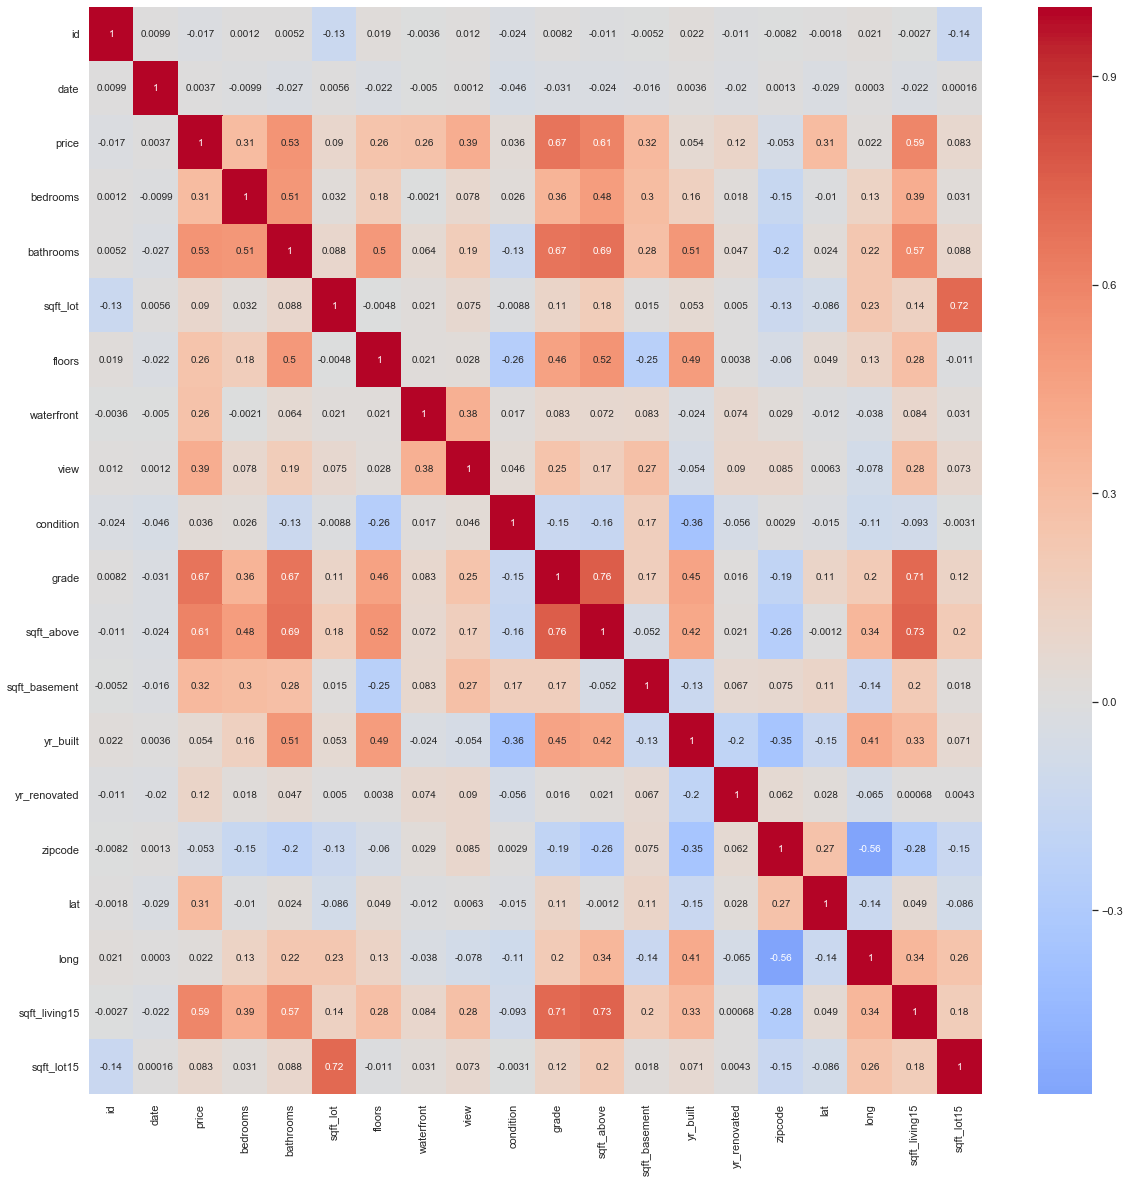

In [34]:
# Now we plot the data
corr = house_price2.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(data=corr, center = 0, cmap="coolwarm", annot=True);

In [35]:
# Result after the ploting:
# There are variables that have a correlation with price:
    #-bedrooms 0,31
    #-bathrooms 0.53
    #-sqft-lot 0.09
    #-floors 0.26
    #-waterfront 0.26
    #-view 0.39
    #-grade 0.67
    #-sqft_above 0.61
    #-sqft_basement 0.32
    #-year_renovated 0.12
    #-lat 0.31
    #-sqft_living 0.59

In [36]:
X = house_price3[[ 'bedrooms', 'bathrooms',
       'sqft_lot', 'floors', 'waterfront', 'view', 'grade',
       'sqft_above', 'sqft_basement']]
y = house_price3[['price']]
X = sms.add_constant(X)
model = sms.OLS(y, X)
results = model.fit()
results.summary()

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     3558.
Date:                Mon, 04 Nov 2019   Prob (F-statistic):               0.00
Time:                        09:37:15   Log-Likelihood:            -2.9757e+05
No. Observations:               21597   AIC:                         5.952e+05
Df Residuals:                   21587   BIC:                         5.952e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.885e+05   1.45e+04    -33.750      0.000   -5.17e+05    -4.6e+05
bedrooms      -3.127e+04   2187.107    -14.298      0.000   -3.56e+04    -2.7e+04
bathrooms     -1.821e+04   3534.324     -5.152      0.000   -2.51e+04   -1.13e+04
sqft_lot         -0.3254      0.039     -8.246      0.000      -0.403      -0.248
floors        -1.387e+04   3955.110     -3.507      0.000   -2.16e+04   -6119.784
waterfront     6.176e+05    2.1e+04     29.446      0.000    5.76e+05    6.59e+05
view           6.314e+04   2387.533     26.447      0.000    5.85e+04    6.78e+04
grade          1.013e+05   2297.346     44.105      0.000    9.68e+04    1.06e+05
sqft_above      188.4959      3.761     50.116      0.000     181.124     195.868
sqft_basement   227.6879      4.856     46.888      0.000     218.170     237.206
==============================================================================
Omnibus:                    15359.291   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           851357.231
Skew:                           2.838   Prob(JB):                         0.00
Kurtosis:                      33.230   Cond. No.                     5.84e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""